<a href="https://colab.research.google.com/github/Miro2311/computervision/blob/main/dataengineering_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓 Data Engineering & Wrangling
## Übung 1: Explorative Datenanalyse (EDA)
### Cafe Sales Dataset - Dirty Data for Training

---

**Lernziele:**
- ✅ Pandas Grundlagen anwenden
- ✅ Datenqualität systematisch bewerten
- ✅ Explorative Analyse durchführen
- ✅ Visualisierungen erstellen
- ✅ Business Insights gewinnen

**Dataset:** [Cafe Sales - Dirty Data](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training)

---

### 📚 Inhaltsverzeichnis

1. Setup & Import
2. Daten laden
3. Erste Inspektion
4. Missing Values Analyse
5. Duplikate Analyse
6. Datentypen prüfen
7. Beschreibende Statistik
8. Univariate Analyse
9. Bivariate Analyse
10. Zeitreihen-Analyse
12. Data Quality Summary
Übungsaufgaben

In [ ]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Plotting Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Pandas Display Optionen
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print("✅ Setup complete!")
print(f"📦 Pandas Version: {pd.__version__}")
print(f"📦 NumPy Version: {np.__version__}")

✅ Setup complete!
📦 Pandas Version: 2.2.2
📦 NumPy Version: 2.0.2


## 📂 2. Daten laden

**Aufgabe:** Lade die Datei `Cafe Sales.csv` hoch.

**Für Google Colab:**
- Klicke auf das Ordner-Symbol links
- Upload die CSV-Datei
- Oder nutze den Upload-Code in der nächsten Zelle

**Für lokales Jupyter:**
- Stelle sicher, dass die Datei im gleichen Ordner wie dieses Notebook ist
- Oder passe den Pfad entsprechend an

In [ ]:
# Für Google Colab: Datei hochladen
try:
    from google.colab import files
    print("📤 Bitte lade die Datei 'dirty_cafe_sales.csv' hoch:")
    uploaded = files.upload()
except:
    print("ℹ️ Lokales Jupyter erkannt - stelle sicher, dass 'dirty_cafe_sales.csv' im gleichen Ordner liegt")

📤 Bitte lade die Datei 'dirty_cafe_sales.csv' hoch:


Saving dirty_cafe_sales.csv to dirty_cafe_sales.csv


In [ ]:
# CSV-Datei einlesen
try:
    df = pd.read_csv('dirty_cafe_sales.csv', encoding='utf-8')
    print("✅ Datei mit UTF-8 encoding geladen")
except:
    df = pd.read_csv('dirty_cafe_sales.csv', encoding='latin-1')
    print("✅ Datei mit Latin-1 encoding geladen")

print(f"\n📊 Dataset geladen: {len(df):,} Zeilen x {len(df.columns)} Spalten")

✅ Datei mit UTF-8 encoding geladen

📊 Dataset geladen: 10,000 Zeilen x 8 Spalten


In [ ]:
# Erste 10 Zeilen anschauen
print("👀 Erste 10 Zeilen des Datasets:\n")
df.head(10)

👀 Erste 10 Zeilen des Datasets:



,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


## 🔍 3. Erste Inspektion

Bevor wir mit der Analyse beginnen, verschaffen wir uns einen Überblick:
- Wie viele Zeilen und Spalten haben wir?
- Welche Spalten gibt es?
- Welche Datentypen liegen vor?
- Wie viel Speicher benötigt das Dataset?

In [ ]:
# Dataset Shape
print("📐 Dataset Dimensionen:")
print(f"   Anzahl Zeilen: {df.shape[0]:,}")
print(f"   Anzahl Spalten: {df.shape[1]}")

# Spalten anzeigen
print(f"\n📋 Spaltennamen ({len(df.columns)}):")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")

# Memory Usage
memory_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"\n💾 Speichernutzung: {memory_mb:.2f} MB")

📐 Dataset Dimensionen:
   Anzahl Zeilen: 10,000
   Anzahl Spalten: 8

📋 Spaltennamen (8):
    1. Transaction ID
    2. Item
    3. Quantity
    4. Price Per Unit
    5. Total Spent
    6. Payment Method
    7. Location
    8. Transaction Date

💾 Speichernutzung: 4.07 MB


In [ ]:
# Datentypen anzeigen
print("🔤 Datentypen pro Spalte:")
print(df.dtypes)

print("\n" + "="*80)
print("📊 Detaillierte Dataset-Info:")
print("="*80)
df.info()

🔤 Datentypen pro Spalte:
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

📊 Detaillierte Dataset-Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


## ❌ 4. Missing Values Analyse

Missing Values (fehlende Werte) sind eines der häufigsten Datenqualitätsprobleme.

**Fragen die wir beantworten:**
- Welche Spalten haben Missing Values?
- Wie viel Prozent fehlen?
- Gibt es Muster in den fehlenden Werten?

**Wichtig:** Missing Values können aus verschiedenen Gründen entstehen:
- Technische Fehler beim Sammeln
- Nutzer haben Felder nicht ausgefüllt
- Daten sind tatsächlich nicht vorhanden (z.B. kein zweiter Vorname)

In [ ]:
# Missing Values pro Spalte
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

# Als DataFrame für bessere Übersicht
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

# Nur Spalten mit Missing Values anzeigen
print("❌ Spalten mit Missing Values:")
print("="*70)
missing_with_nulls = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_with_nulls) > 0:
    print(missing_with_nulls.to_string(index=False))
else:
    print("✅ Keine Missing Values gefunden!")

# Gesamtstatistik
total_cells = len(df) * len(df.columns)
total_missing = missing.sum()
print(f"\n📊 Gesamt: {total_missing:,} fehlende Werte von {total_cells:,} Zellen ({total_missing/total_cells*100:.2f}%)")

❌ Spalten mit Missing Values:
          Column  Missing_Count  Missing_Percentage
        Location           3265               32.65
  Payment Method           2579               25.79
            Item            333                3.33
  Price Per Unit            179                1.79
     Total Spent            173                1.73
Transaction Date            159                1.59
        Quantity            138                1.38

📊 Gesamt: 6,826 fehlende Werte von 80,000 Zellen (8.53%)


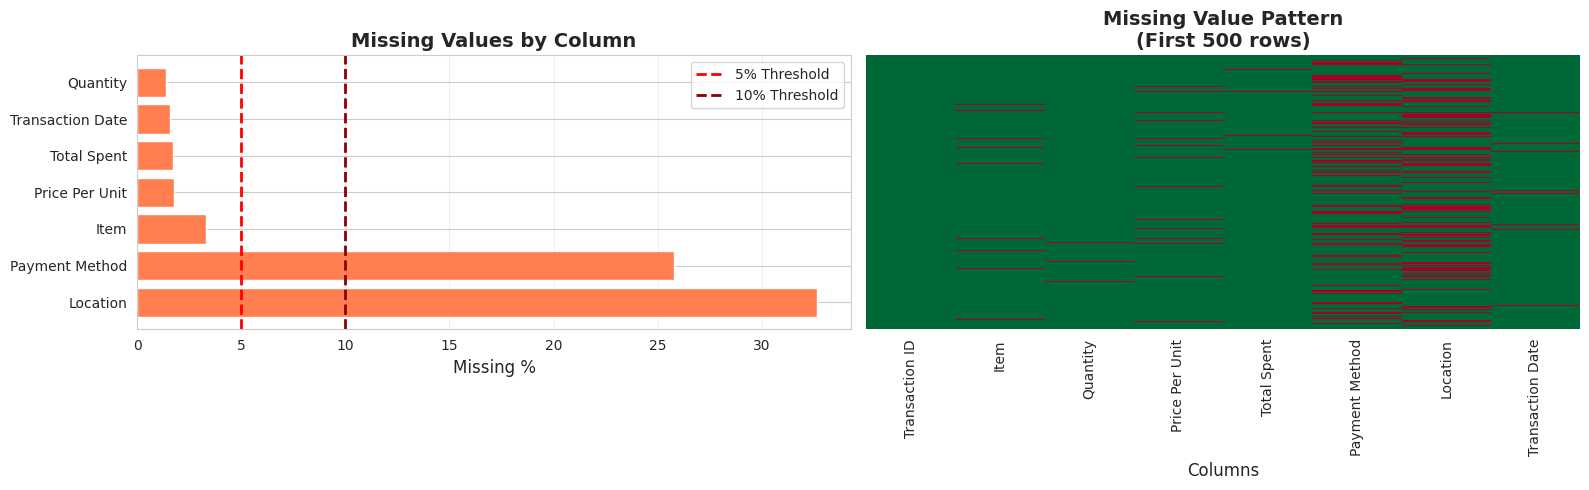


📊 Missing Value Patterns:
   Rows mit mind. 1 Missing Value: 5,450 (54.5%)
   Vollständige Rows: 4,550 (45.5%)


In [ ]:
# Visualisierung der Missing Values
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Barplot: Missing Percentage
missing_cols = missing_df[missing_df['Missing_Count'] > 0]
if len(missing_cols) > 0:
    axes[0].barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
    axes[0].set_xlabel('Missing %', fontsize=12)
    axes[0].set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    axes[0].axvline(x=5, color='red', linestyle='--', linewidth=2, label='5% Threshold')
    axes[0].axvline(x=10, color='darkred', linestyle='--', linewidth=2, label='10% Threshold')
    axes[0].legend()
    axes[0].grid(axis='x', alpha=0.3)
else:
    axes[0].text(0.5, 0.5, '✅ No Missing Values',
                ha='center', va='center', fontsize=20, color='green')
    axes[0].set_xlim([0, 1])
    axes[0].set_ylim([0, 1])
    axes[0].axis('off')

# Heatmap: Missing Pattern (erste 500 Zeilen)
sns.heatmap(
    df.head(500).isnull(),
    cbar=False,
    yticklabels=False,
    cmap='RdYlGn_r',
    ax=axes[1]
)
axes[1].set_title('Missing Value Pattern\n(First 500 rows)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Columns', fontsize=12)

plt.tight_layout()
plt.show()

# Missing Value Patterns
rows_with_missing = df.isnull().any(axis=1).sum()
rows_complete = len(df) - rows_with_missing

print(f"\n📊 Missing Value Patterns:")
print(f"   Rows mit mind. 1 Missing Value: {rows_with_missing:,} ({rows_with_missing/len(df)*100:.1f}%)")
print(f"   Vollständige Rows: {rows_complete:,} ({rows_complete/len(df)*100:.1f}%)")

## 🔄 5. Duplikate Analyse

Duplikate können entstehen durch:
- Technische Fehler (doppeltes Speichern)
- Nutzer-Fehler (mehrfach Submit)
- Data Integration Probleme

**Arten von Duplikaten:**
1. **Exakte Duplikate:** Alle Spalten identisch
2. **Partial Duplikate:** Nur bestimmte Spalten identisch (z.B. gleiche Transaction ID)

**Wichtig:** Nicht alle Duplikate sind Fehler! Manchmal sind sie legitim (z.B. gleicher Kunde kauft mehrfach).

In [ ]:
# Exakte Duplikate (alle Spalten)
total_duplicates = df.duplicated().sum()
duplicate_pct = (total_duplicates / len(df)) * 100

print("🔄 DUPLIKATE ANALYSE")
print("="*70)
print(f"\nExakte Duplikate (alle Spalten): {total_duplicates:,} ({duplicate_pct:.2f}%)")

if total_duplicates > 0:
    print(f"\n⚠️ Gefundene Duplikate:")

    # Zeige Duplikate (mit Originalen)
    duplicate_mask = df.duplicated(keep=False)
    print(f"   Zeilen inkl. Originale: {duplicate_mask.sum():,}")

    print("\n📋 Erste 10 Duplikate:")
    display(df[duplicate_mask].head(10))
else:
    print("✅ Keine exakten Duplikate gefunden!")

# Check spezifische ID-Spalten
id_columns = [col for col in df.columns if 'id' in col.lower()]

if id_columns:
    print(f"\n🆔 ID-Spalten Check:")
    for id_col in id_columns:
        id_dups = df[id_col].duplicated().sum()
        if id_dups > 0:
            print(f"   ⚠️ {id_col}: {id_dups:,} Duplikate (sollten unique sein!)")
        else:
            print(f"   ✅ {id_col}: Alle unique")

🔄 DUPLIKATE ANALYSE

Exakte Duplikate (alle Spalten): 0 (0.00%)
✅ Keine exakten Duplikate gefunden!

🆔 ID-Spalten Check:
   ✅ Transaction ID: Alle unique


In [ ]:
# Visualisierung
if total_duplicates > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Pie Chart
    labels = ['Unique Rows', 'Duplicate Rows']
    sizes = [len(df) - total_duplicates, total_duplicates]
    colors = ['#2ecc71', '#e74c3c']
    explode = (0, 0.1)

    axes[0].pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})
    axes[0].set_title('Unique vs. Duplicate Rows', fontsize=14, fontweight='bold')

    # Bar Chart
    axes[1].bar(labels, sizes, color=colors, edgecolor='black', linewidth=2)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_title('Row Distribution', fontsize=14, fontweight='bold')

    # Annotations
    for i, v in enumerate(sizes):
        axes[1].text(i, v + max(sizes)*0.02, f'{v:,}\n({v/len(df)*100:.1f}%)',
                    ha='center', fontweight='bold', fontsize=11)

    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Keine Visualisierung nötig - keine Duplikate vorhanden")

ℹ️ Keine Visualisierung nötig - keine Duplikate vorhanden


## 🔤 6. Datentypen prüfen und konvertieren

**Warum sind korrekte Datentypen wichtig?**
- ⚡ Performance: Operationen sind schneller
- 💾 Speicher: Richtige Typen sparen RAM
- 🎯 Funktionalität: Datum-Operationen brauchen datetime

**Typische Probleme:**
- Datum als String gespeichert (`object` statt `datetime64`)
- Zahlen als String (`"42"` statt `42`)
- Kategorien als String (zu viel Memory)

In [ ]:
# Datentypen Übersicht
print("🔤 DATENTYPEN ÜBERSICHT")
print("="*70)

dtype_summary = df.dtypes.value_counts()
print("\nAnzahl Spalten pro Datentyp:")
print(dtype_summary)

# Kategorisieren
print("\n📊 Spalten nach Kategorie:")
print("\nNumerische Spalten:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for i, col in enumerate(numeric_cols, 1):
    print(f"   {i}. {col} ({df[col].dtype})")

print("\nText/Objekt Spalten:")
object_cols = df.select_dtypes(include=['object']).columns.tolist()
for i, col in enumerate(object_cols, 1):
    unique_count = df[col].nunique()
    print(f"   {i}. {col} ({unique_count:,} unique values)")

print("\nDatum Spalten:")
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
if date_cols:
    for i, col in enumerate(date_cols, 1):
        print(f"   {i}. {col}")
else:
    print("   ⚠️ Keine datetime Spalten gefunden - Konvertierung nötig!")

🔤 DATENTYPEN ÜBERSICHT

Anzahl Spalten pro Datentyp:
object    8
Name: count, dtype: int64

📊 Spalten nach Kategorie:

Numerische Spalten:

Text/Objekt Spalten:
   1. Transaction ID (10,000 unique values)
   2. Item (10 unique values)
   3. Quantity (7 unique values)
   4. Price Per Unit (8 unique values)
   5. Total Spent (19 unique values)
   6. Payment Method (5 unique values)
   7. Location (4 unique values)
   8. Transaction Date (367 unique values)

Datum Spalten:
   ⚠️ Keine datetime Spalten gefunden - Konvertierung nötig!


In [ ]:
# Datum-Spalten identifizieren und konvertieren
print("\n📅 DATUM-KONVERTIERUNG")
print("="*70)

# Suche nach Datum-Spalten
potential_date_cols = [col for col in df.columns
                       if 'date' in col.lower() or 'time' in col.lower()]

if potential_date_cols:
    print(f"\n🔍 Potenzielle Datum-Spalten gefunden: {potential_date_cols}")

    for col in potential_date_cols:
        print(f"\n📅 Spalte: {col}")
        print(f"   Aktueller Typ: {df[col].dtype}")
        print(f"   Beispiel-Werte: {df[col].head(3).tolist()}")

        # Konvertierung versuchen
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
                print(f"   ✅ Erfolgreich zu datetime konvertiert!")

                # Info über fehlgeschlagene Konvertierungen
                failed = df[col].isnull().sum()
                if failed > 0:
                    print(f"   ⚠️ {failed} Werte konnten nicht konvertiert werden (NaT)")

            except Exception as e:
                print(f"   ❌ Konvertierung fehlgeschlagen: {e}")
        else:
            print(f"   ℹ️ Bereits im richtigen Format")
else:
    print("⚠️ Keine Datum-Spalten gefunden")

# Aktualisierte Typ-Übersicht
print("\n📊 Aktualisierte Datentypen:")
print(df.dtypes.value_counts())


📅 DATUM-KONVERTIERUNG

🔍 Potenzielle Datum-Spalten gefunden: ['Transaction Date']

📅 Spalte: Transaction Date
   Aktueller Typ: object
   Beispiel-Werte: ['2023-09-08', '2023-05-16', '2023-07-19']
   ✅ Erfolgreich zu datetime konvertiert!
   ⚠️ 460 Werte konnten nicht konvertiert werden (NaT)

📊 Aktualisierte Datentypen:
object            7
datetime64[ns]    1
Name: count, dtype: int64


## 📊 7. Beschreibende Statistik

Jetzt schauen wir uns die Verteilung der Daten an:
- **Zentrale Tendenz:** Mean, Median
- **Streuung:** Std, Min, Max
- **Quantile:** 25%, 50%, 75%

Diese Statistiken helfen uns:
- Ausreißer zu identifizieren
- Normale vs. schiefe Verteilungen zu erkennen
- Business-Metriken zu berechnen

In [ ]:
# Beschreibende Statistik für numerische Spalten
print("📊 BESCHREIBENDE STATISTIK - Numerische Spalten")
print("="*70)
df.describe()

📊 BESCHREIBENDE STATISTIK - Numerische Spalten


,Transaction Date
count,9540
mean,2023-07-01 23:00:31.698113280
min,2023-01-01 00:00:00
25%,2023-04-01 00:00:00
50%,2023-07-02 00:00:00
75%,2023-10-02 00:00:00
max,2023-12-31 00:00:00


In [ ]:
# Kategorische Spalten - Top Values
print("\n📝 TOP VALUES - Kategorische Spalten")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"   Unique Values: {df[col].nunique():,}")
    print(f"   Top 5:")

    top_5 = df[col].value_counts().head()
    for value, count in top_5.items():
        pct = (count / len(df)) * 100
        print(f"      {value}: {count:,} ({pct:.1f}%)")


📝 TOP VALUES - Kategorische Spalten

Transaction ID:
   Unique Values: 10,000
   Top 5:
      TXN_9226047: 1 (0.0%)
      TXN_8567525: 1 (0.0%)
      TXN_4583012: 1 (0.0%)
      TXN_6796890: 1 (0.0%)
      TXN_9933628: 1 (0.0%)

Item:
   Unique Values: 10
   Top 5:
      Juice: 1,171 (11.7%)
      Coffee: 1,165 (11.7%)
      Salad: 1,148 (11.5%)
      Cake: 1,139 (11.4%)
      Sandwich: 1,131 (11.3%)

Quantity:
   Unique Values: 7
   Top 5:
      5: 2,013 (20.1%)
      2: 1,974 (19.7%)
      4: 1,863 (18.6%)
      3: 1,849 (18.5%)
      1: 1,822 (18.2%)

Price Per Unit:
   Unique Values: 8
   Top 5:
      3.0: 2,429 (24.3%)
      4.0: 2,331 (23.3%)
      2.0: 1,227 (12.3%)
      5.0: 1,204 (12.0%)
      1.0: 1,143 (11.4%)

Total Spent:
   Unique Values: 19
   Top 5:
      6.0: 979 (9.8%)
      12.0: 939 (9.4%)
      3.0: 930 (9.3%)
      4.0: 923 (9.2%)
      20.0: 746 (7.5%)

Payment Method:
   Unique Values: 5
   Top 5:
      Digital Wallet: 2,291 (22.9%)
      Credit Card: 2,273 (2

In [ ]:
pd.to_numeric(df['Quantity'], errors='coerce')
pd.to_numeric(df['Price Per Unit'], errors='coerce')

,Price Per Unit
0,2.00
1,3.00
2,1.00
3,5.00
4,2.00
...,...
9995,2.00
9996,NaN
9997,2.00
9998,NaN


In [ ]:
# Business Metriken berechnen
print("\n💰 BUSINESS METRIKEN")
print("="*70)

# Revenue berechnen falls möglich
if 'Price Per Unit' in df.columns and 'Quantity' in df.columns:
    if 'total_price' not in df.columns:
      print('bla')
      df['total_price'] = pd.to_numeric(df['Price Per Unit'], errors='coerce') * pd.to_numeric(df['Quantity'], errors='coerce')
      print("✅ total_price berechnet (Price Per Unit × Quantity)")

    print(f"\n💵 Umsatz-Kennzahlen:")
    print(f"   Total Revenue: CHF{df['total_price'].sum():,.2f}")
    print(f"   Average Transaction: CHF{df['total_price'].mean():.2f}")
    print(f"   Median Transaction: CHF{df['total_price'].median():.2f}")
    print(f"   Std Deviation: CHF{df['total_price'].std():.2f}")
    print(f"   Min Transaction: CHF{df['total_price'].min():.2f}")
    print(f"   Max Transaction: CHF{df['total_price'].max():.2f}")

    # Quartile
    print(f"\n📊 Quartile:")
    print(f"   25% (Q1): CHF{df['total_price'].quantile(0.25):.2f}")
    print(f"   50% (Q2/Median): CHF{df['total_price'].quantile(0.50):.2f}")
    print(f"   75% (Q3): CHF{df['total_price'].quantile(0.75):.2f}")
else:
    print("⚠️ Spalten unit_price oder quantity nicht gefunden")


💰 BUSINESS METRIKEN
bla
✅ total_price berechnet (Price Per Unit × Quantity)

💵 Umsatz-Kennzahlen:
   Total Revenue: CHF80,478.50
   Average Transaction: CHF8.94
   Median Transaction: CHF8.00
   Std Deviation: CHF5.99
   Min Transaction: CHF1.00
   Max Transaction: CHF25.00

📊 Quartile:
   25% (Q1): CHF4.00
   50% (Q2/Median): CHF8.00
   75% (Q3): CHF12.00


## 📈 8. Univariate Analyse - Verteilungen

**Univariate Analyse** = Analyse einzelner Variablen

**Ziele:**
- Verstehen wie Daten verteilt sind
- Normalverteilung vs. Schiefe erkennen
- Outliers identifizieren
- Business Patterns erkennen

**Visualisierungen:**
- Histogramme → Verteilung
- Boxplots → Outliers
- Bar Charts → Kategorien

📊 VERTEILUNGEN - Numerische Variablen


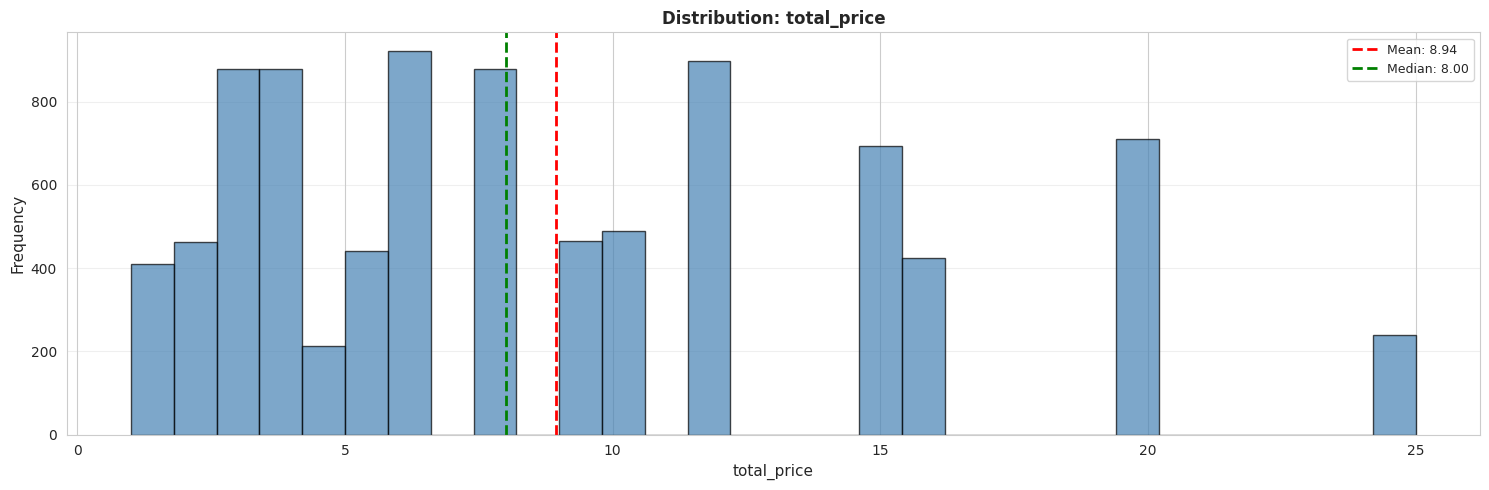

In [ ]:
# Histogramme für numerische Spalten
print("📊 VERTEILUNGEN - Numerische Variablen")
print("="*70)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    # Axes zu flachem Array machen
    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    for idx, col in enumerate(numeric_cols):
        if idx < len(axes):
            # Histogram
            axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black',
                          alpha=0.7, color='steelblue')
            axes[idx].set_xlabel(col, fontsize=11)
            axes[idx].set_ylabel('Frequency', fontsize=11)
            axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')

            # Statistik-Linien
            mean_val = df[col].mean()
            median_val = df[col].median()
            axes[idx].axvline(mean_val, color='red', linestyle='--',
                             linewidth=2, label=f'Mean: {mean_val:.2f}')
            axes[idx].axvline(median_val, color='green', linestyle='--',
                             linewidth=2, label=f'Median: {median_val:.2f}')
            axes[idx].legend(fontsize=9)
            axes[idx].grid(axis='y', alpha=0.3)

    # Leere Subplots verstecken
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Keine numerischen Spalten gefunden")


📦 BOXPLOTS - Outlier Detection


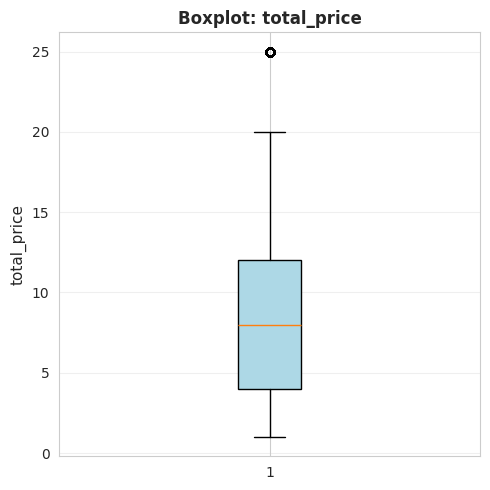

In [ ]:
# Boxplots
print("\n📦 BOXPLOTS - Outlier Detection")
print("="*70)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) > 0:
    n_plots = min(3, len(numeric_cols))
    fig, axes = plt.subplots(1, n_plots, figsize=(5*n_plots, 5))

    if n_plots == 1:
        axes = [axes]

    for idx, col in enumerate(numeric_cols[:n_plots]):
        # Boxplot
        bp = axes[idx].boxplot(df[col].dropna(), patch_artist=True)
        axes[idx].set_ylabel(col, fontsize=11)
        axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)

        # Farbe
        for patch in bp['boxes']:
            patch.set_facecolor('lightblue')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Keine numerischen Spalten gefunden")

In [ ]:
# Outlier Detection mit IQR
print("\n🎯 OUTLIER DETECTION (IQR Method)")
print("="*70)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

outlier_summary = []

for col in numeric_cols[:5]:  # Erste 5 Spalten
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100

    print(f"\n{col}:")
    print(f"   Q1 (25%): {Q1:.2f}")
    print(f"   Q3 (75%): {Q3:.2f}")
    print(f"   IQR: {IQR:.2f}")
    print(f"   Lower Bound: {lower_bound:.2f}")
    print(f"   Upper Bound: {upper_bound:.2f}")
    print(f"   Outliers: {len(outliers):,} ({outlier_pct:.2f}%)")

    if outlier_pct > 5:
        print(f"   ⚠️ Hoher Outlier-Anteil!")

    outlier_summary.append({
        'Column': col,
        'Outliers': len(outliers),
        'Percentage': outlier_pct
    })

# Zusammenfassung
if outlier_summary:
    outlier_df = pd.DataFrame(outlier_summary)
    print("\n📊 Outlier Zusammenfassung:")
    print(outlier_df.to_string(index=False))


🎯 OUTLIER DETECTION (IQR Method)

total_price:
   Q1 (25%): 4.00
   Q3 (75%): 12.00
   IQR: 8.00
   Lower Bound: -8.00
   Upper Bound: 24.00
   Outliers: 240 (2.40%)

📊 Outlier Zusammenfassung:
     Column  Outliers  Percentage
total_price       240        2.40



📊 KATEGORISCHE VARIABLEN - Top Values


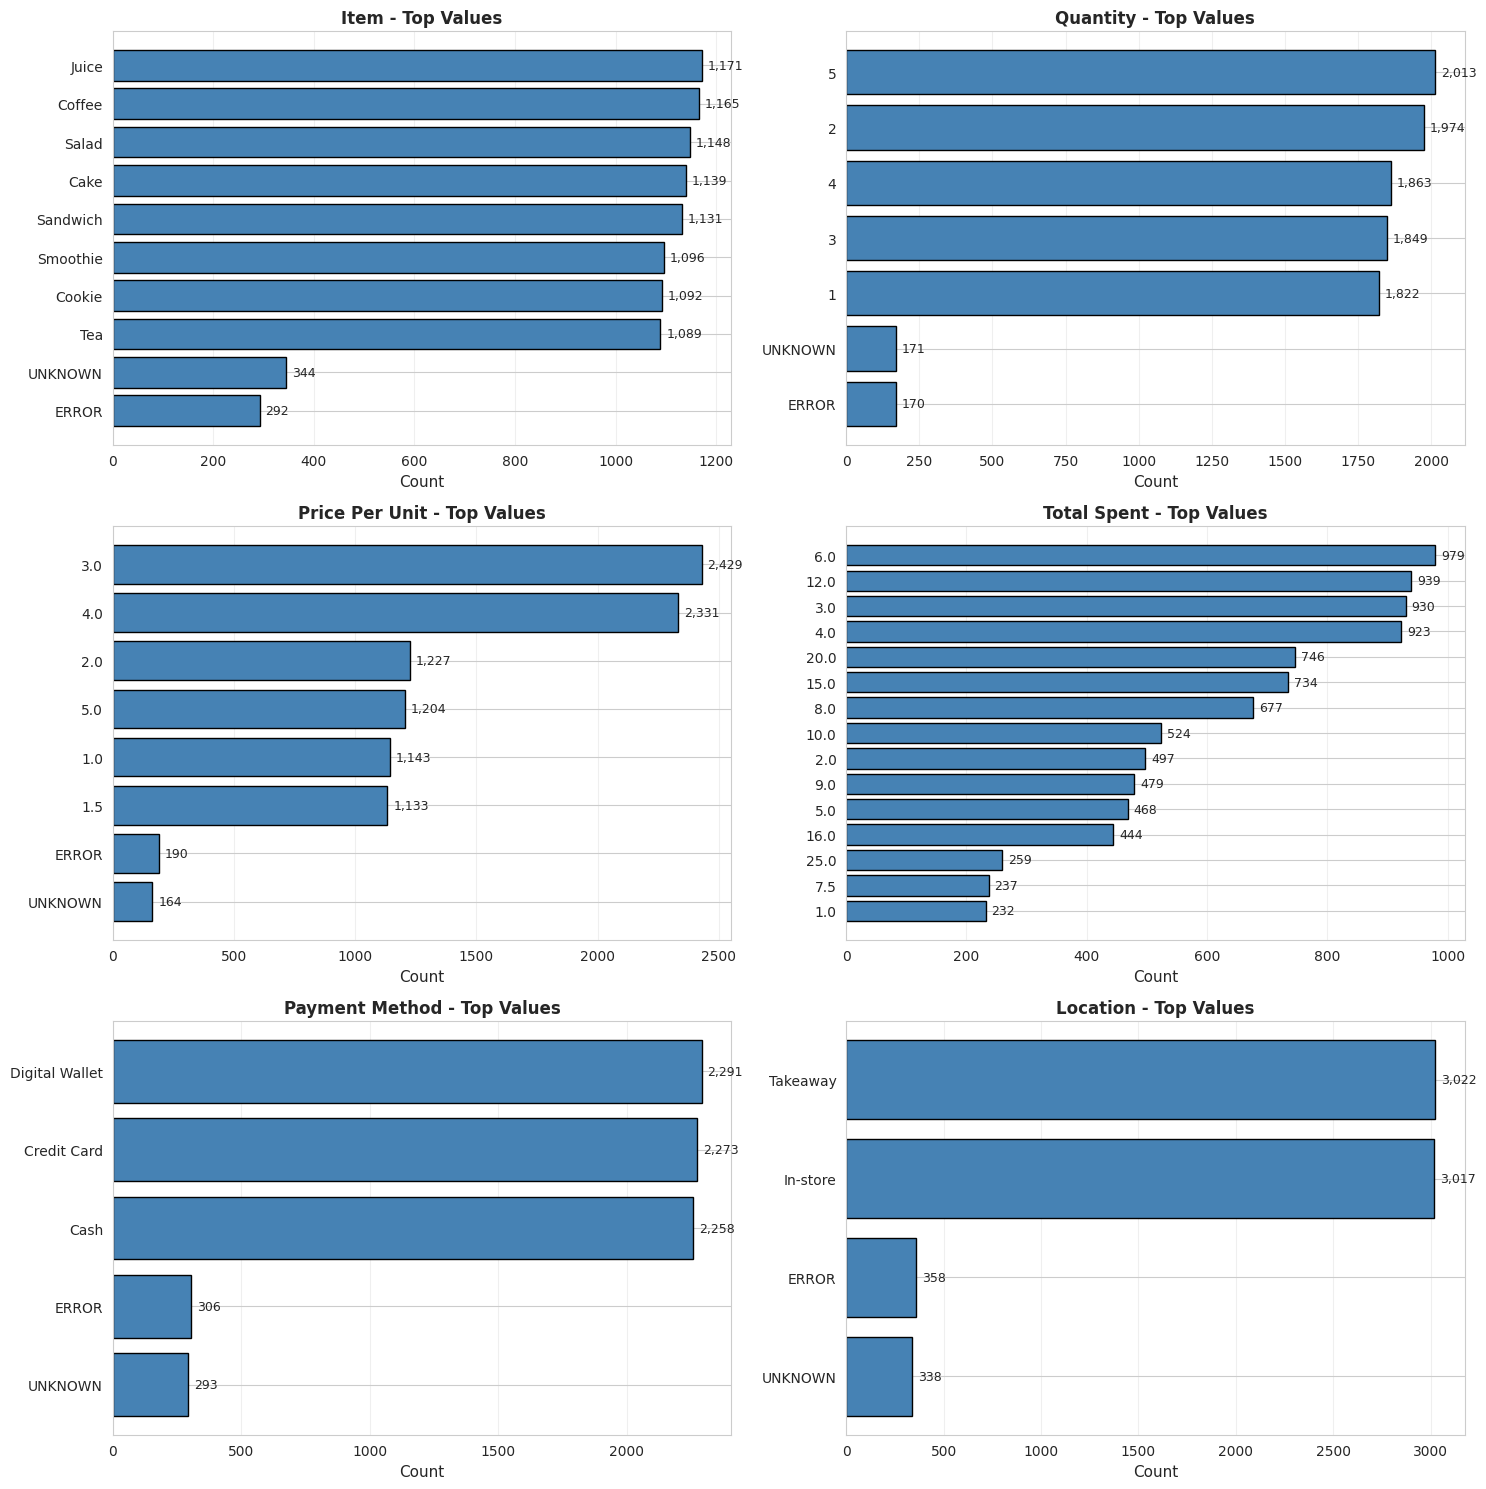

In [ ]:
# Bar Charts für kategorische Variablen
print("\n📊 KATEGORISCHE VARIABLEN - Top Values")
print("="*70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Nur Spalten mit <= 20 unique values für Übersichtlichkeit
categorical_cols_plot = [col for col in categorical_cols if df[col].nunique() <= 20]

if len(categorical_cols_plot) > 0:
    n_cols = min(2, len(categorical_cols_plot))
    n_rows = (len(categorical_cols_plot) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows == 1 or n_cols == 1:
        axes = axes.flatten()
    else:
        axes = axes.flatten()

    for idx, col in enumerate(categorical_cols_plot):
        if idx < len(axes):
            # Top 15 Values
            value_counts = df[col].value_counts().head(15)

            # Horizontal Bar Chart
            axes[idx].barh(range(len(value_counts)), value_counts.values,
                          color='steelblue', edgecolor='black')
            axes[idx].set_yticks(range(len(value_counts)))
            axes[idx].set_yticklabels(value_counts.index)
            axes[idx].set_xlabel('Count', fontsize=11)
            axes[idx].set_title(f'{col} - Top Values', fontsize=12, fontweight='bold')
            axes[idx].grid(axis='x', alpha=0.3)
            axes[idx].invert_yaxis()

            # Counts annotieren
            for i, v in enumerate(value_counts.values):
                axes[idx].text(v + max(value_counts.values)*0.01, i,
                              f'{v:,}', va='center', fontsize=9)

    # Leere Subplots verstecken
    for idx in range(len(categorical_cols_plot), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Keine geeigneten kategorischen Spalten für Visualisierung")

## 🔗 9. Bivariate Analyse

**Bivariate Analyse** = Beziehungen zwischen zwei Variablen

**Fragen:**
- Welche Variablen korrelieren stark?
- Gibt es Zusammenhänge zwischen Preis und Menge?
- Welche Kategorie generiert am meisten Umsatz?

**Methoden:**
- Korrelationsmatrix (Heatmap)
- Scatter Plots
- Grouped Aggregationen

In [ ]:
# Korrelationsmatrix
print("🔗 KORRELATIONSMATRIX")
print("="*70)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

if len(numeric_cols) >= 2:
    corr_matrix = df[numeric_cols].corr()

    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=2, fmt='.2f',
                cbar_kws={'label': 'Correlation'})
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

    # Starke Korrelationen finden
    print("\n🔗 Starke Korrelationen (|r| > 0.7):")
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                col1 = corr_matrix.columns[i]
                col2 = corr_matrix.columns[j]
                print(f"   {col1} ↔ {col2}: {corr_val:.3f}")
                strong_corr.append((col1, col2, corr_val))

    if not strong_corr:
        print("   ℹ️ Keine starken Korrelationen gefunden")
else:
    print("⚠️ Zu wenige numerische Spalten für Korrelationsanalyse")

🔗 KORRELATIONSMATRIX
⚠️ Zu wenige numerische Spalten für Korrelationsanalyse



📊 SCATTER PLOTS - Bivariate Beziehungen


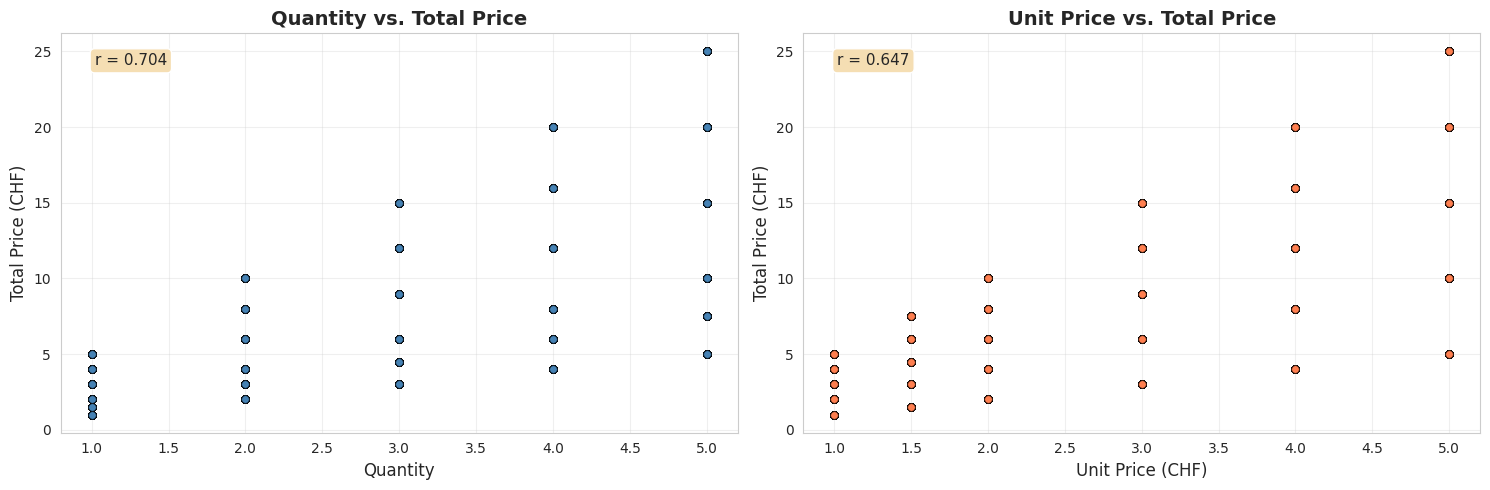

In [ ]:
# Scatter Plots für wichtige Beziehungen
print("\n📊 SCATTER PLOTS - Bivariate Beziehungen")
print("="*70)

# Konvertiere die relevanten Spalten zu numerischen Typen
# Fehlerhafte Werte werden zu NaN (Not a Number) konvertiert
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')

if 'Price Per Unit' in df.columns and 'Quantity' in df.columns and 'Total Spent' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Quantity vs. Total Price
    axes[0].scatter(df['Quantity'], df['Total Spent'], alpha=0.5, s=30,
                   color='steelblue', edgecolors='black', linewidth=0.5)
    axes[0].set_xlabel('Quantity', fontsize=12)
    axes[0].set_ylabel('Total Price (CHF)', fontsize=12)
    axes[0].set_title('Quantity vs. Total Price', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # Correlation coefficient
    # Da die Spalten jetzt numerisch sind, können wir die Korrelation berechnen. NaNs werden ignoriert.
    corr_qty_price = df['Quantity'].corr(df['Total Spent'])
    axes[0].text(0.05, 0.95, f'r = {corr_qty_price:.3f}',
                transform=axes[0].transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

    # Unit Price vs. Total Price
    axes[1].scatter(df['Price Per Unit'], df['Total Spent'], alpha=0.5, s=30,
                   color='coral', edgecolors='black', linewidth=0.5)
    axes[1].set_xlabel('Unit Price (CHF)', fontsize=12)
    axes[1].set_ylabel('Total Price (CHF)', fontsize=12)
    axes[1].set_title('Unit Price vs. Total Price', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)

    # Correlation coefficient
    corr_unit_total = df['Price Per Unit'].corr(df['Total Spent'])
    axes[1].text(0.05, 0.95, f'r = {corr_unit_total:.3f}',
                transform=axes[1].transAxes, fontsize=11,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Benötigte Spalten nicht verfügbar")


💰 REVENUE BY CATEGORY

Analysiere: Item

📊 Revenue Metriken nach Kategorie:


,Total_Revenue,Avg_Transaction,Transactions
Item,,,
Salad,16605.00,15.15,1096
Sandwich,12956.00,12.17,1065
Smoothie,12556.00,12.26,1024
Juice,9984.00,8.95,1115
Cake,9933.00,9.13,1088
Coffee,6784.00,6.08,1115
Tea,4735.50,4.55,1041
Cookie,3070.00,2.97,1035
UNKNOWN,2757.50,8.56,322


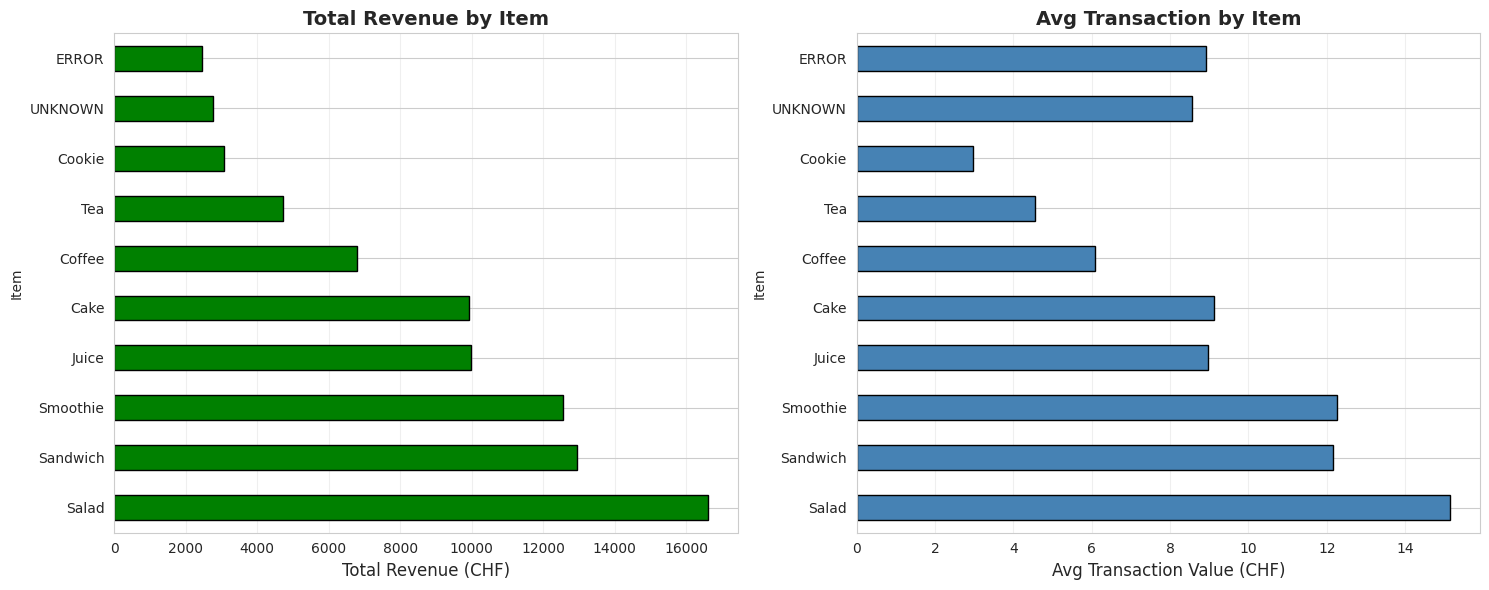

In [ ]:
# Revenue by Category
print("\n💰 REVENUE BY CATEGORY")
print("="*70)

# Suche nach Category-Spalte
category_col = "Item"
for col in df.columns:
    if 'Location' in col.lower() or 'Item' in col.lower():
        category_col = col
        break

if category_col and 'Total Spent' in df.columns:
    print(f"\nAnalysiere: {category_col}")

    # Aggregation
    revenue_by_cat = df.groupby(category_col)['Total Spent'].agg([
        ('Total_Revenue', 'sum'),
        ('Avg_Transaction', 'mean'),
        ('Transactions', 'count')
    ]).sort_values('Total_Revenue', ascending=False)

    print("\n📊 Revenue Metriken nach Kategorie:")
    display(revenue_by_cat)

    # Visualisierung
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Total Revenue
    revenue_by_cat['Total_Revenue'].plot(kind='barh', ax=axes[0],
                                         color='green', edgecolor='black')
    axes[0].set_xlabel('Total Revenue (CHF)', fontsize=12)
    axes[0].set_title(f'Total Revenue by {category_col}', fontsize=14, fontweight='bold')
    axes[0].grid(axis='x', alpha=0.3)

    # Average Transaction Value
    revenue_by_cat['Avg_Transaction'].plot(kind='barh', ax=axes[1],
                                           color='steelblue', edgecolor='black')
    axes[1].set_xlabel('Avg Transaction Value (CHF)', fontsize=12)
    axes[1].set_title(f'Avg Transaction by {category_col}', fontsize=14, fontweight='bold')
    axes[1].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Kategorie-Spalte oder total_price nicht gefunden")

## 📅 10. Zeitreihen-Analyse

**Zeitreihen-Analyse** zeigt uns Trends und Patterns über Zeit:
- Wachstum oder Rückgang?
- Saisonale Effekte?
- Wochentag-Patterns?
- Peak-Zeiten?

**Wichtig für Business:**
- Staffing-Planung
- Inventory Management
- Marketing-Timing
- Revenue Forecasting

In [ ]:
# Zeitreihen-Analyse
print("📅 ZEITREIHEN-ANALYSE")
print("="*70)

# Datum-Spalten finden
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

if len(date_cols) > 0:
    date_col = date_cols[0]
    print(f"\n✅ Analysiere Zeitreihe: {date_col}")

    # Zeitspanne
    print(f"\n⏱️ Zeitspanne:")
    print(f"   Start: {df[date_col].min()}")
    print(f"   Ende: {df[date_col].max()}")
    time_span = (df[date_col].max() - df[date_col].min()).days
    print(f"   Dauer: {time_span} Tage ({time_span/365:.1f} Jahre)")

    # Temporal Features extrahieren
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day
    df['dayofweek'] = df[date_col].dt.dayofweek
    df['hour'] = df[date_col].dt.hour
    df['date_only'] = df[date_col].dt.date

    print("\n✅ Temporal Features erstellt:")
    print("   - year, month, day")
    print("   - dayofweek (0=Monday, 6=Sunday)")
    print("   - hour")
    print("   - date_only")
else:
    print("\n⚠️ Keine Datum-Spalte gefunden!")
    print("   Bitte konvertiere relevante Spalten zu datetime")

📅 ZEITREIHEN-ANALYSE

✅ Analysiere Zeitreihe: Transaction Date

⏱️ Zeitspanne:
   Start: 2023-01-01 00:00:00
   Ende: 2023-12-31 00:00:00
   Dauer: 364 Tage (1.0 Jahre)

✅ Temporal Features erstellt:
   - year, month, day
   - dayofweek (0=Monday, 6=Sunday)
   - hour
   - date_only



📊 DAILY TRENDS


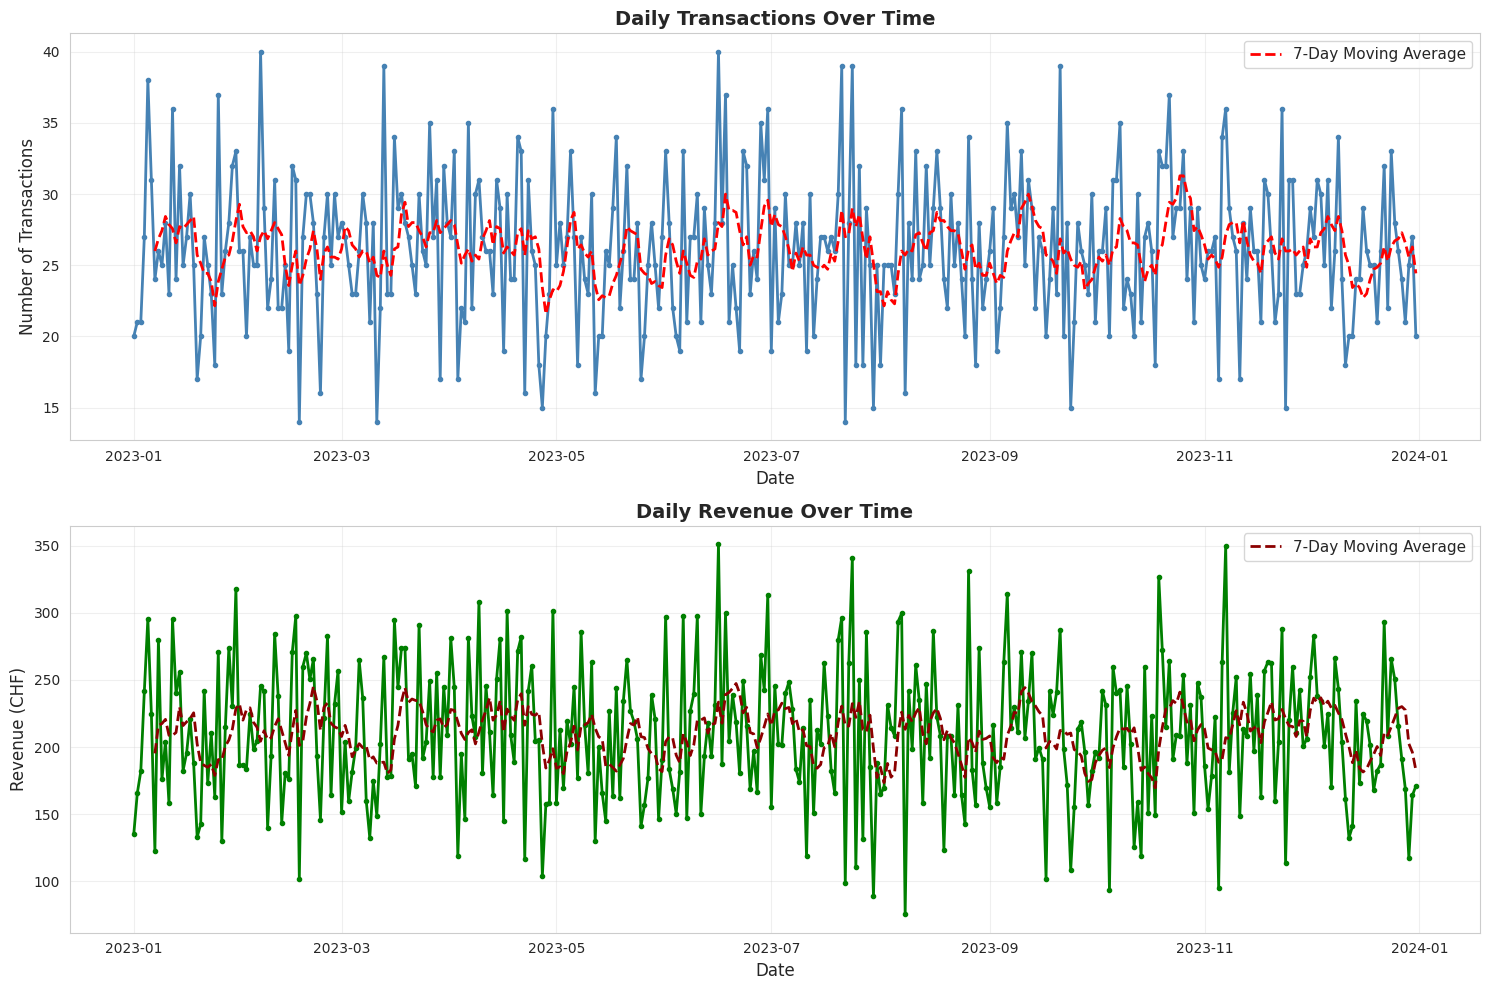

In [ ]:
# Daily Transactions & Revenue über Zeit
if len(date_cols) > 0:
    print("\n📊 DAILY TRENDS")
    print("="*70)

    # Transaktionen pro Tag
    daily_trans = df.groupby('date_only').size()

    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))

    # Transaktionen
    axes[0].plot(daily_trans.index, daily_trans.values,
                color='steelblue', linewidth=2, marker='o', markersize=3)
    axes[0].set_xlabel('Date', fontsize=12)
    axes[0].set_ylabel('Number of Transactions', fontsize=12)
    axes[0].set_title('Daily Transactions Over Time', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)

    # 7-day moving average
    ma_7 = daily_trans.rolling(window=7).mean()
    axes[0].plot(ma_7.index, ma_7.values, color='red',
                linestyle='--', linewidth=2, label='7-Day Moving Average')
    axes[0].legend(fontsize=11)

    # Revenue (falls vorhanden)
    if 'total_price' in df.columns:
        daily_revenue = df.groupby('date_only')['total_price'].sum()

        axes[1].plot(daily_revenue.index, daily_revenue.values,
                    color='green', linewidth=2, marker='o', markersize=3)
        axes[1].set_xlabel('Date', fontsize=12)
        axes[1].set_ylabel('Revenue (CHF)', fontsize=12)
        axes[1].set_title('Daily Revenue Over Time', fontsize=14, fontweight='bold')
        axes[1].grid(True, alpha=0.3)

        # 7-day moving average
        ma_rev_7 = daily_revenue.rolling(window=7).mean()
        axes[1].plot(ma_rev_7.index, ma_rev_7.values, color='darkred',
                    linestyle='--', linewidth=2, label='7-Day Moving Average')
        axes[1].legend(fontsize=11)

    plt.tight_layout()
    plt.show()

In [ ]:
# Key Insights Zusammenfassung
print("💡 KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

print("\n📋 DATASET ZUSAMMENFASSUNG:")
print(f"   📊 Größe: {len(df):,} Transaktionen × {len(df.columns)} Features")

if len(date_cols) > 0:
    date_col = date_cols[0]
    time_span = (df[date_col].max() - df[date_col].min()).days
    print(f"   📅 Zeitraum: {df[date_col].min().date()} bis {df[date_col].max().date()}")
    print(f"   ⏱️ Dauer: {time_span} Tage ({time_span/365:.1f} Jahre)")

missing_total = df.isnull().sum().sum()
missing_pct = (missing_total / (len(df) * len(df.columns))) * 100
print(f"   ❌ Missing Values: {missing_total:,} ({missing_pct:.2f}%)")

dup_count = df.duplicated().sum()
dup_pct = (dup_count / len(df)) * 100
print(f"   🔄 Duplikate: {dup_count:,} ({dup_pct:.2f}%)")

if 'total_price' in df.columns:
    print(f"\n💰 BUSINESS METRIKEN:")
    print(f"   💵 Total Revenue: CHF{df['total_price'].sum():,.2f}")
    print(f"   📊 Avg Transaction: CHF{df['total_price'].mean():.2f}")

    if len(date_cols) > 0:
        daily_avg = len(df) / time_span
        print(f"   📈 Transactions/Day: {daily_avg:.1f}")

        daily_revenue = df['total_price'].sum() / time_span
        print(f"   💸 Daily Revenue: CHF{daily_revenue:,.2f}")

print("\n⚠️ IDENTIFIZIERTE PROBLEME:")
issues = []

if missing_total > 0:
    issues.append("Missing Values vorhanden → Cleaning-Strategie definieren")
if dup_count > 0:
    issues.append(f"Duplikate gefunden ({dup_pct:.1f}%) → Entfernen oder analysieren")

# Outlier Check
if 'total_price' in df.columns:
    Q1 = df['total_price'].quantile(0.25)
    Q3 = df['total_price'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['total_price'] < Q1 - 1.5*IQR) | (df['total_price'] > Q3 + 1.5*IQR)]

    if len(outliers) > 0:
        outlier_pct = (len(outliers) / len(df)) * 100
        issues.append(f"Outliers in total_price: {len(outliers):,} ({outlier_pct:.2f}%)")

if len(issues) > 0:
    for i, issue in enumerate(issues, 1):
        print(f"   {i}. {issue}")
else:
    print("   ✅ Keine kritischen Probleme gefunden!")

print("\n💡 EMPFEHLUNGEN FÜR DATA CLEANING:")
print("   1. Missing Values behandeln (Drop vs. Impute entscheiden)")
print("   2. Duplikate entfernen/untersuchen")
print("   3. Outliers analysieren (Business-Kontext beachten!)")
print("   4. Datentypen final validieren")
print("   5. Feature Engineering für Zeitvariablen durchführen")
print("   6. Kategorische Variablen standardisieren")

💡 KEY INSIGHTS & RECOMMENDATIONS

📋 DATASET ZUSAMMENFASSUNG:
   📊 Größe: 10,000 Transaktionen × 15 Features
   📅 Zeitraum: 2023-01-01 bis 2023-12-31
   ⏱️ Dauer: 364 Tage (1.0 Jahre)
   ❌ Missing Values: 11,905 (7.94%)
   🔄 Duplikate: 0 (0.00%)

💰 BUSINESS METRIKEN:
   💵 Total Revenue: CHF80,478.50
   📊 Avg Transaction: CHF8.94
   📈 Transactions/Day: 27.5
   💸 Daily Revenue: CHF221.09

⚠️ IDENTIFIZIERTE PROBLEME:
   1. Missing Values vorhanden → Cleaning-Strategie definieren
   2. Outliers in total_price: 240 (2.40%)

💡 EMPFEHLUNGEN FÜR DATA CLEANING:
   1. Missing Values behandeln (Drop vs. Impute entscheiden)
   2. Duplikate entfernen/untersuchen
   3. Outliers analysieren (Business-Kontext beachten!)
   4. Datentypen final validieren
   5. Feature Engineering für Zeitvariablen durchführen
   6. Kategorische Variablen standardisieren


## 🎯 Übung

**Welcher Wochentag** ist am umsatzstärksten? Um wie viel %?

